In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r"C:\Users\DYNABOOK\Downloads\Hotel Reservations.csv")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
print( df.isnull().sum())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


(array([0, 1]), [Text(0, 0, '2017'), Text(1, 0, '2018')])

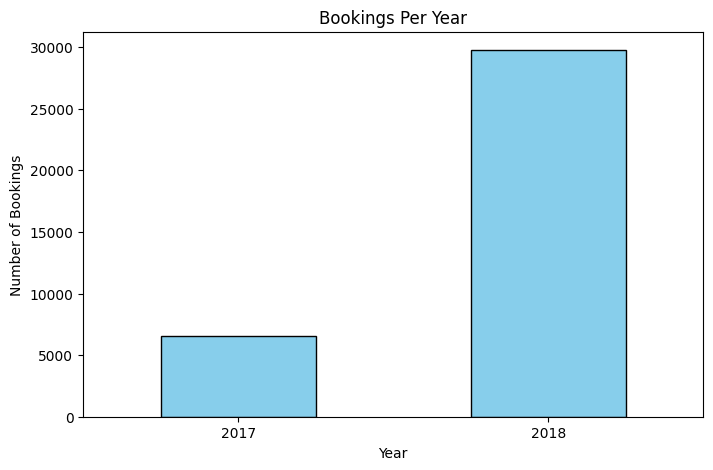

In [ ]:
plt.figure(figsize=(8, 5))
df["arrival_year"].value_counts().sort_index().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Year")
plt.ylabel("Number of Bookings")
plt.title("Bookings Per Year")

<Figure size 1000x600 with 0 Axes>

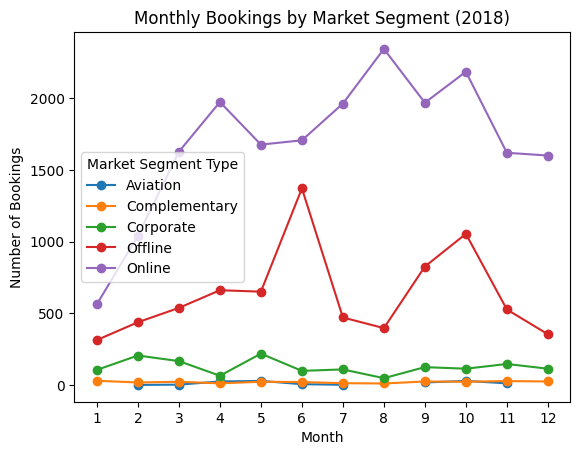

In [65]:


df_2018 = df[df["arrival_year"] == 2018]

monthly_bookings = df_2018.groupby(["arrival_month", "market_segment_type"]).size().unstack()

plt.figure(figsize=(10, 6))  
monthly_bookings.plot(kind="line", marker="o")

plt.title("Monthly Bookings by Market Segment (2018)")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  
plt.legend(title="Market Segment Type")


plt.show()


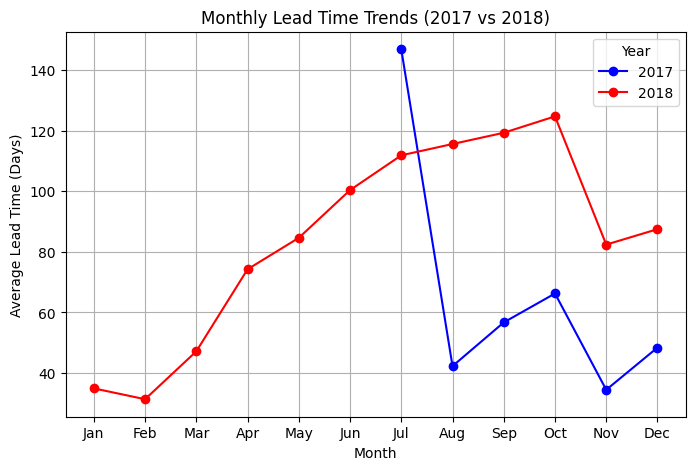

In [ ]:

monthly_lead_time = df.groupby(["arrival_year", "arrival_month"])["lead_time"].mean().reset_index()

pivot_table = monthly_lead_time.pivot(index="arrival_month", columns="arrival_year", values="lead_time")


plt.figure(figsize=(8, 5))
plt.plot(pivot_table.index, pivot_table[2017], marker="o", linestyle="-", label="2017", color='b')
plt.plot(pivot_table.index, pivot_table[2018], marker="o", linestyle="-", label="2018", color='r')

plt.xlabel("Month")
plt.ylabel("Average Lead Time (Days)")
plt.title("Monthly Lead Time Trends (2017 vs 2018)")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(title="Year")
plt.grid(True)
plt.show()


The average lead time in 2018 increased  from March to October, peaking around July-October.
This suggests that customers in 2018 booked their stays further in advance.

C:\Users\DYNABOOK\AppData\Local\Temp\ipykernel_13076\1261325601.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_avg_price["arrival_month"], y=monthly_avg_price["avg_price_per_room"], palette="coolwarm")


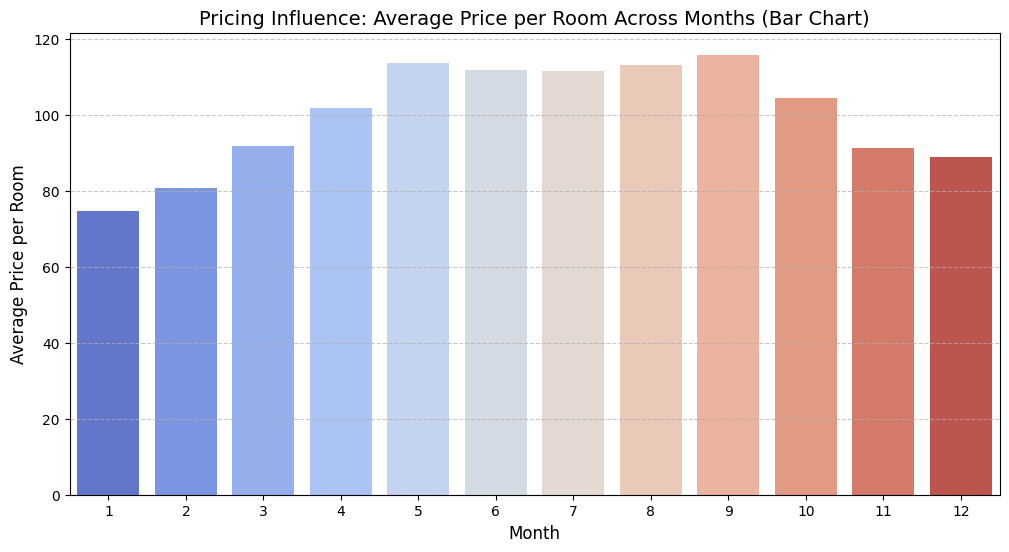

In [6]:
import seaborn as sns
monthly_avg_price = df.groupby("arrival_month")["avg_price_per_room"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg_price["arrival_month"], y=monthly_avg_price["avg_price_per_room"], palette="coolwarm")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Price per Room", fontsize=12)
plt.title("Pricing Influence: Average Price per Room Across Months (Bar Chart)", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


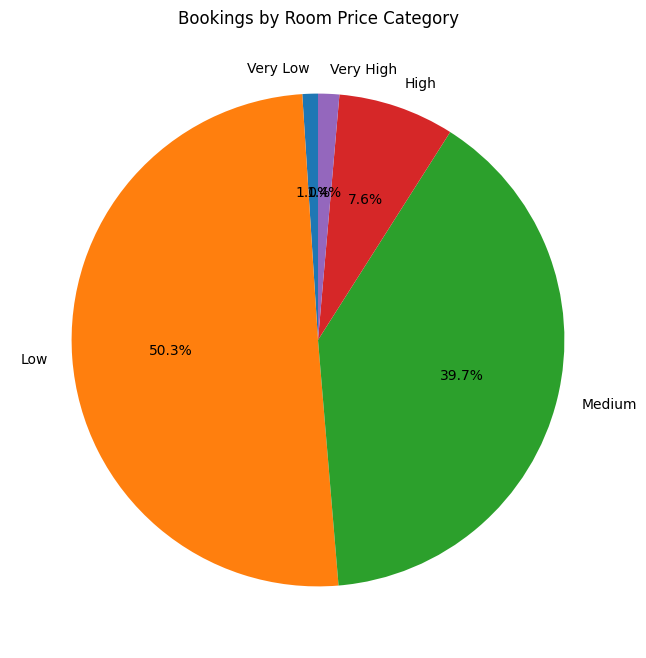

In [28]:

import seaborn as sns

price_bins = [0, 50, 100, 150, 200, df["avg_price_per_room"].max()]
price_labels = ["Very Low", "Low", "Medium", "High", "Very High"]

df["price_category"] = pd.cut(df["avg_price_per_room"], bins=price_bins, labels=price_labels)

price_booking_counts = df["price_category"].value_counts().sort_index()
plt.figure(figsize=(8, 8))

plt.pie(price_booking_counts, labels=price_booking_counts.index, autopct='%1.1f%%', 
         startangle=90)

plt.title("Bookings by Room Price Category")


plt.show()



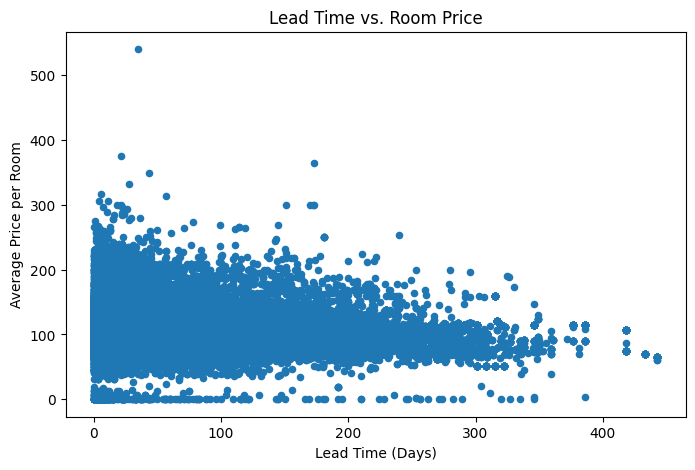

In [7]:

df.plot.scatter(x="lead_time", y="avg_price_per_room", figsize=(8, 5))

plt.xlabel("Lead Time (Days)")
plt.ylabel("Average Price per Room")
plt.title("Lead Time vs. Room Price")
plt.show()




lower price rooms have short lead time so customers book at last minute so we could give discounts for higher priced rooms for before hand picking.

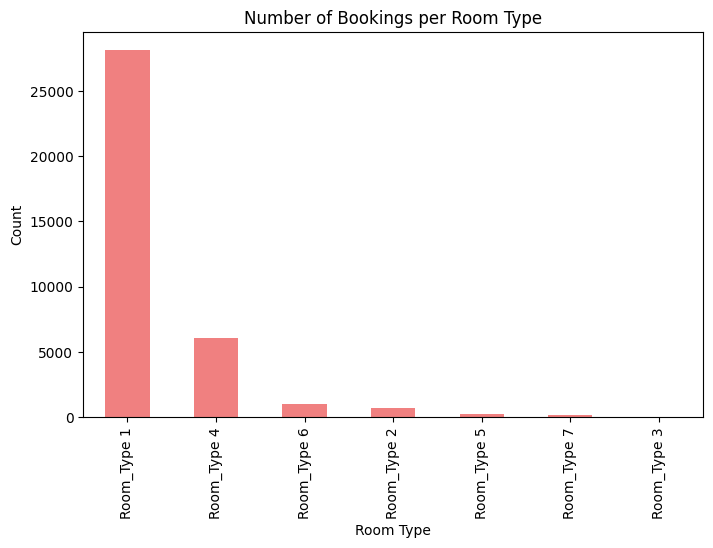

In [ ]:
plt.figure(figsize=(8, 5))
df["room_type_reserved"].value_counts().plot(kind="bar", color="lightcoral")
plt.xlabel("Room Type")
plt.ylabel("Count")
plt.title("Number of Bookings per Room Type")
plt.show()

